<a href="https://colab.research.google.com/github/patel-priyal-m/parkinsons-desiese-detection/blob/main/ADT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os # Import the os module to interact with the operating system

!git clone https://github.com/patel-priyal-m/parkinsons-desiese-detection.git
os.chdir('parkinsons-desiese-detection')

print(os.listdir())

fatal: destination path 'parkinsons-desiese-detection' already exists and is not an empty directory.
['adt.ipynb', 'ADT2.ipynb', 'Data', '.git', 'parkinsons-desiese-detection', 'ImgNew.ipynb', 'README.md', 'image.ipynb']


In [33]:

import pandas as pd

# Assuming the repository contains a CSV file named 'parkinsons.csv'
df = pd.read_csv('Data/new_dataset.csv')


In [65]:
df.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Parkinson
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18.0,70,10,0.0,0.0,0.0,1,3.0,0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24.0,28,53,3.0,0.0,3.0,1,3.0,0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20.0,70,10,1.0,0.0,0.0,0,3.0,0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28.0,25,52,3.0,50.0,5.0,1,1.0,0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27.0,55,18,3.0,0.0,3.0,0,3.0,0


In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("## Dataframe Information")
print(df.info())

## Dataframe Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    float64
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    452 non-null    float64
 12  Alcohol consumption     452 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequenc

In [36]:

# Convert 'smoking_status' to int (Yes=1, No=0)
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
print(df.head())


   ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                  18.0                     70   
1              0.66                  24.0                     28   
2              0.89                  20.0                     70   
3              0.51                  28.0                     25   
4              0.76                  27.0                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      10         0.0          

In [37]:
print("\n## Summary Statistics")
print(df.describe())


## Summary Statistics
               ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              23.002212              52.960177               24.831858   
std                3.972466              15.561713               15.150774   
min               15.000000              20.000000           

In [38]:

print("\n## Missing Values Count")
print(df.isnull().sum())


## Missing Values Count
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption       0
Alcohol consumption        0
Smoking status             0
Exercise frequency         6
Parkinson                  0
dtype: int64


In [39]:
 data = df

<Figure size 1600x1200 with 0 Axes>

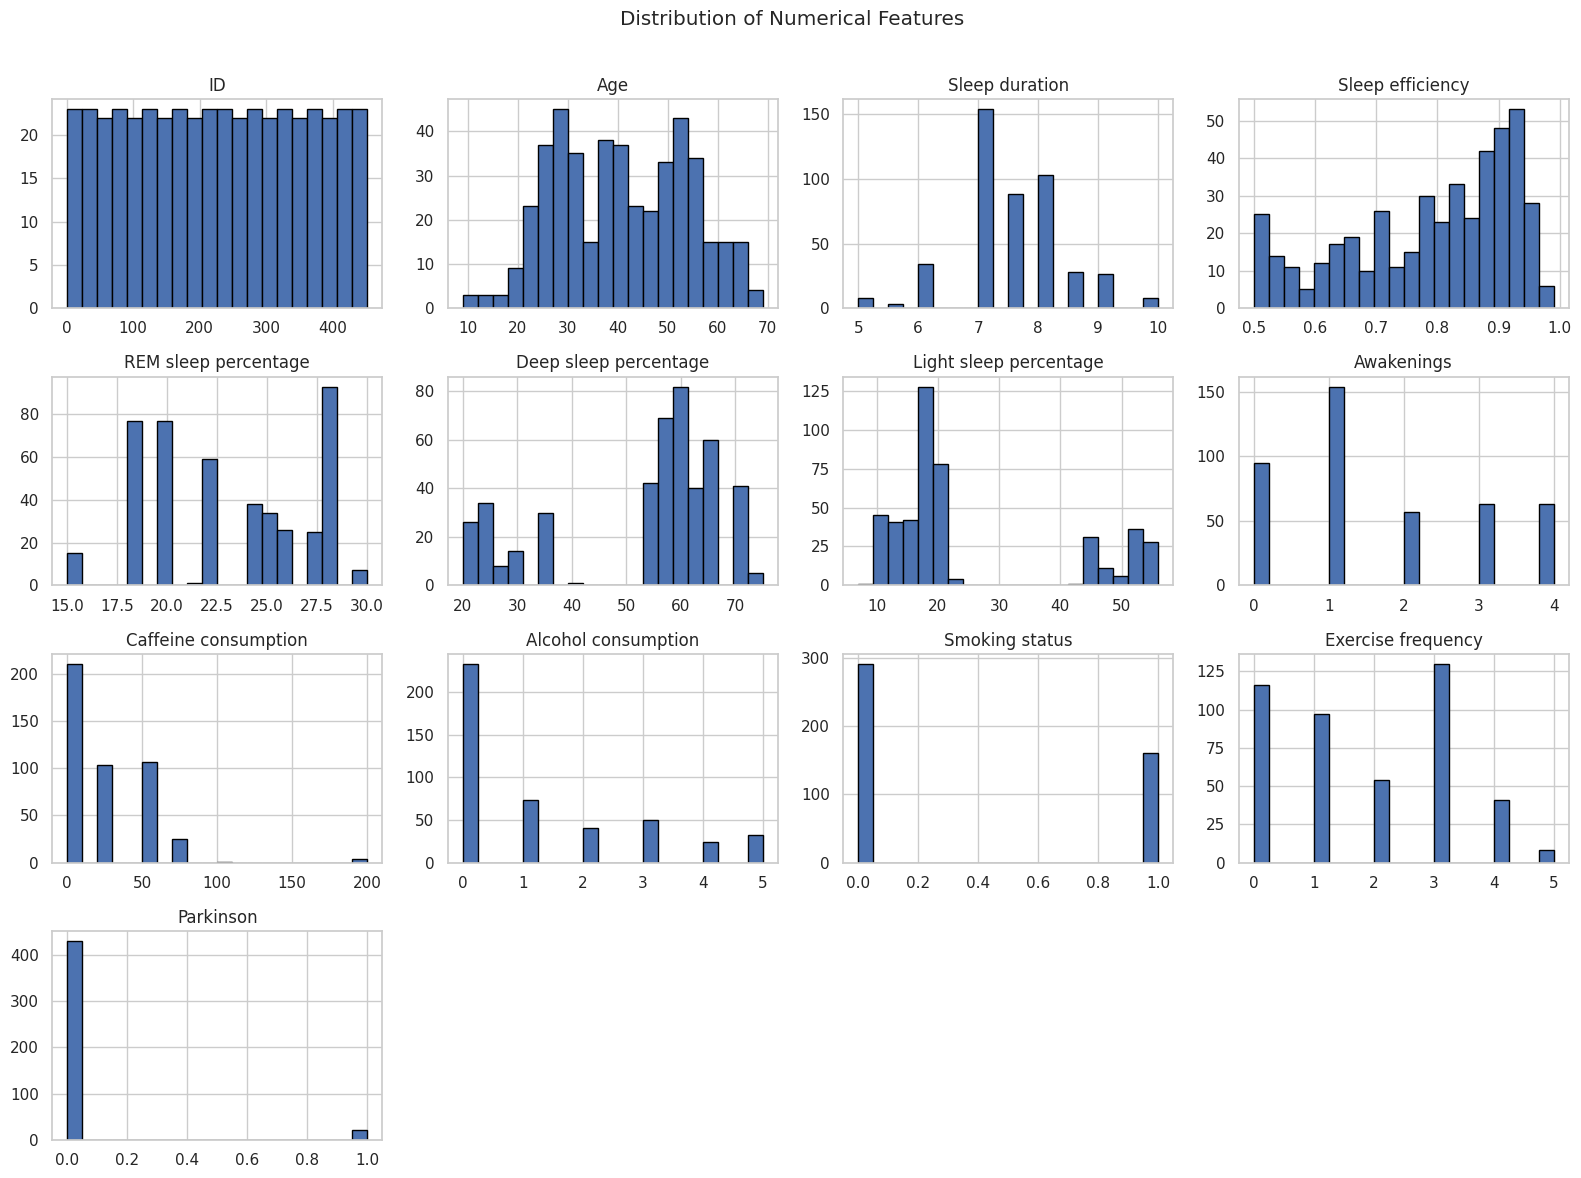

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# Plot histograms for numerical variables
data.hist(bins=20, figsize=(16, 12), layout=(4, 4), edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#handle class destribution

In [41]:
# Check class distribution
class_distribution = data['Parkinson'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)


Class Distribution:
Parkinson
0    0.951327
1    0.048673
Name: proportion, dtype: float64


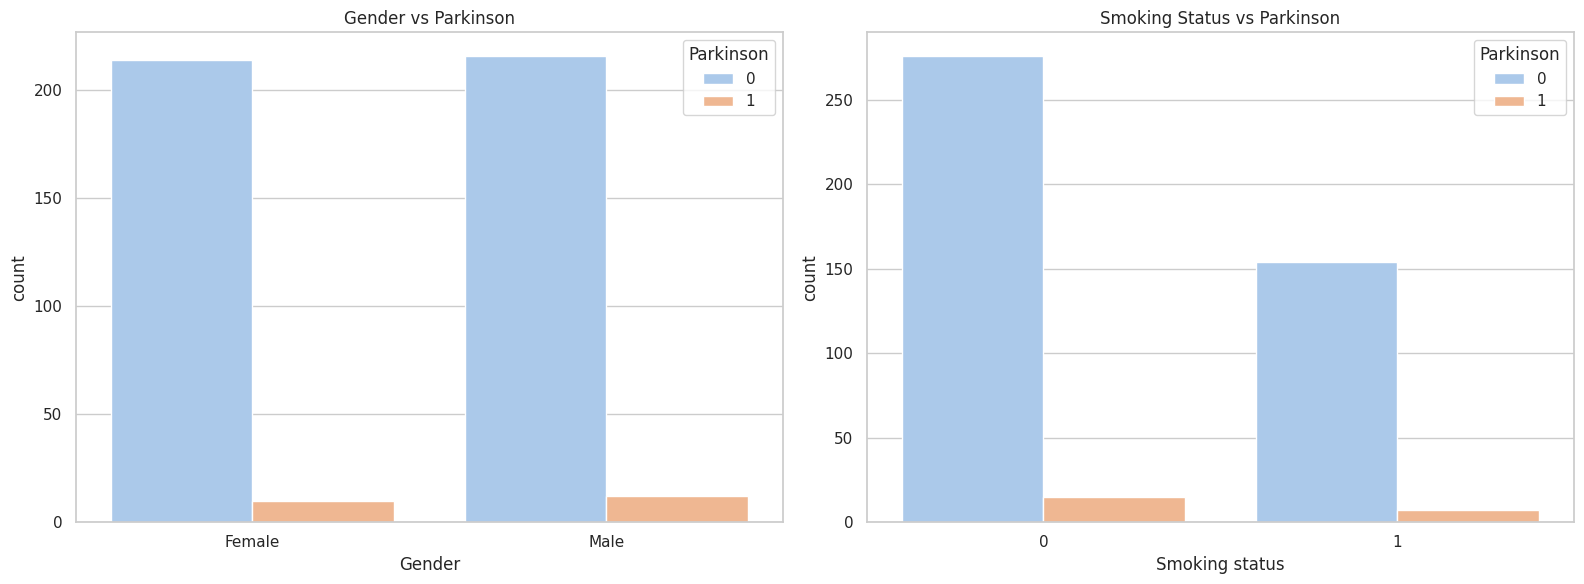

In [42]:
# Plot bar plots for categorical variables against the target variable
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gender vs Parkinson
sns.countplot(x='Gender', hue='Parkinson', data=data, ax=axes[0], palette='pastel')
axes[0].set_title('Gender vs Parkinson')

# Smoking status vs Parkinson
sns.countplot(x='Smoking status', hue='Parkinson', data=data, ax=axes[1], palette='pastel')
axes[1].set_title('Smoking Status vs Parkinson')

plt.tight_layout()
plt.show()



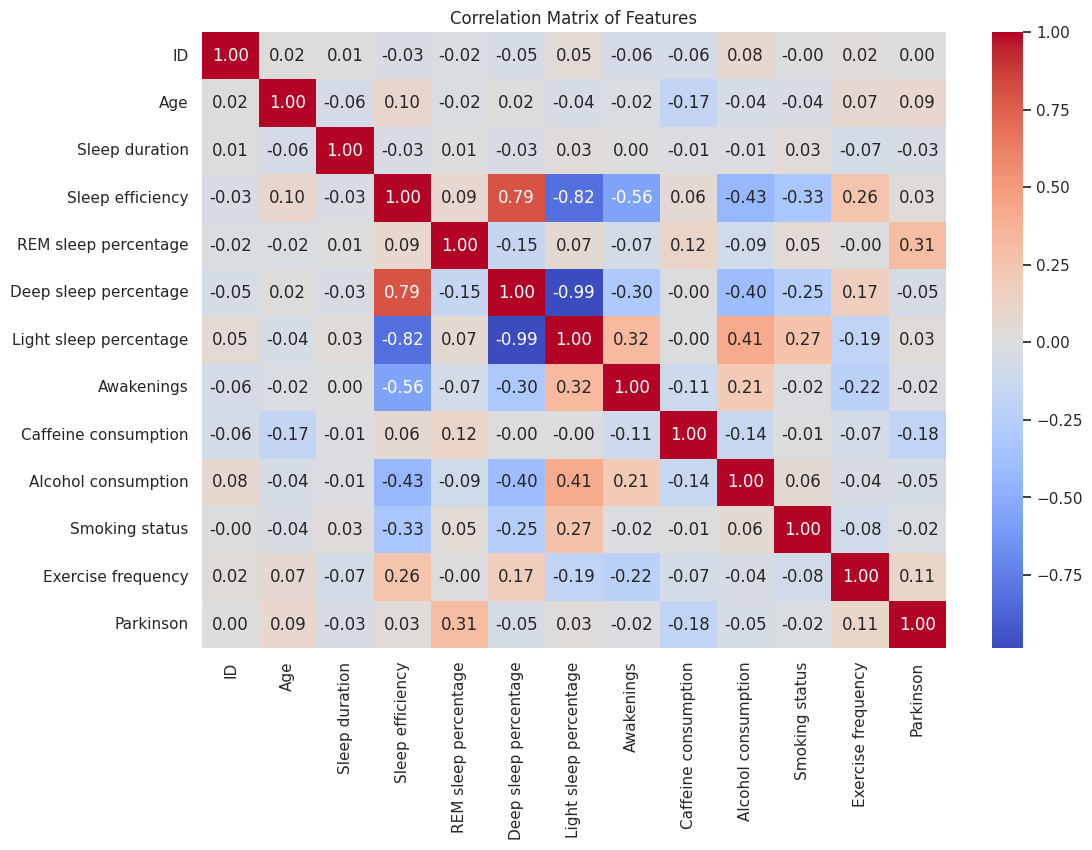

In [43]:
import numpy as np
# Plot correlation matrix
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns from correlation calculation
correlation_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Handle Missing values

In [44]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values in the Dataset:")
missing_values



Missing Values in the Dataset:


ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption       0
Alcohol consumption        0
Smoking status             0
Exercise frequency         6
Parkinson                  0
dtype: int64

In [45]:
# Fill missing values for 'Awakenings' with median since it's numerical and skewed
data['Awakenings'].fillna(data['Awakenings'].median(), inplace=True)

# Fill missing values for 'Exercise frequency' with the mode since it seems more categorical
data['Exercise frequency'].fillna(data['Exercise frequency'].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after = data.isnull().sum()

print("\nMissing Values After Handling:")
missing_values_after


Missing Values After Handling:


ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
Parkinson                 0
dtype: int64

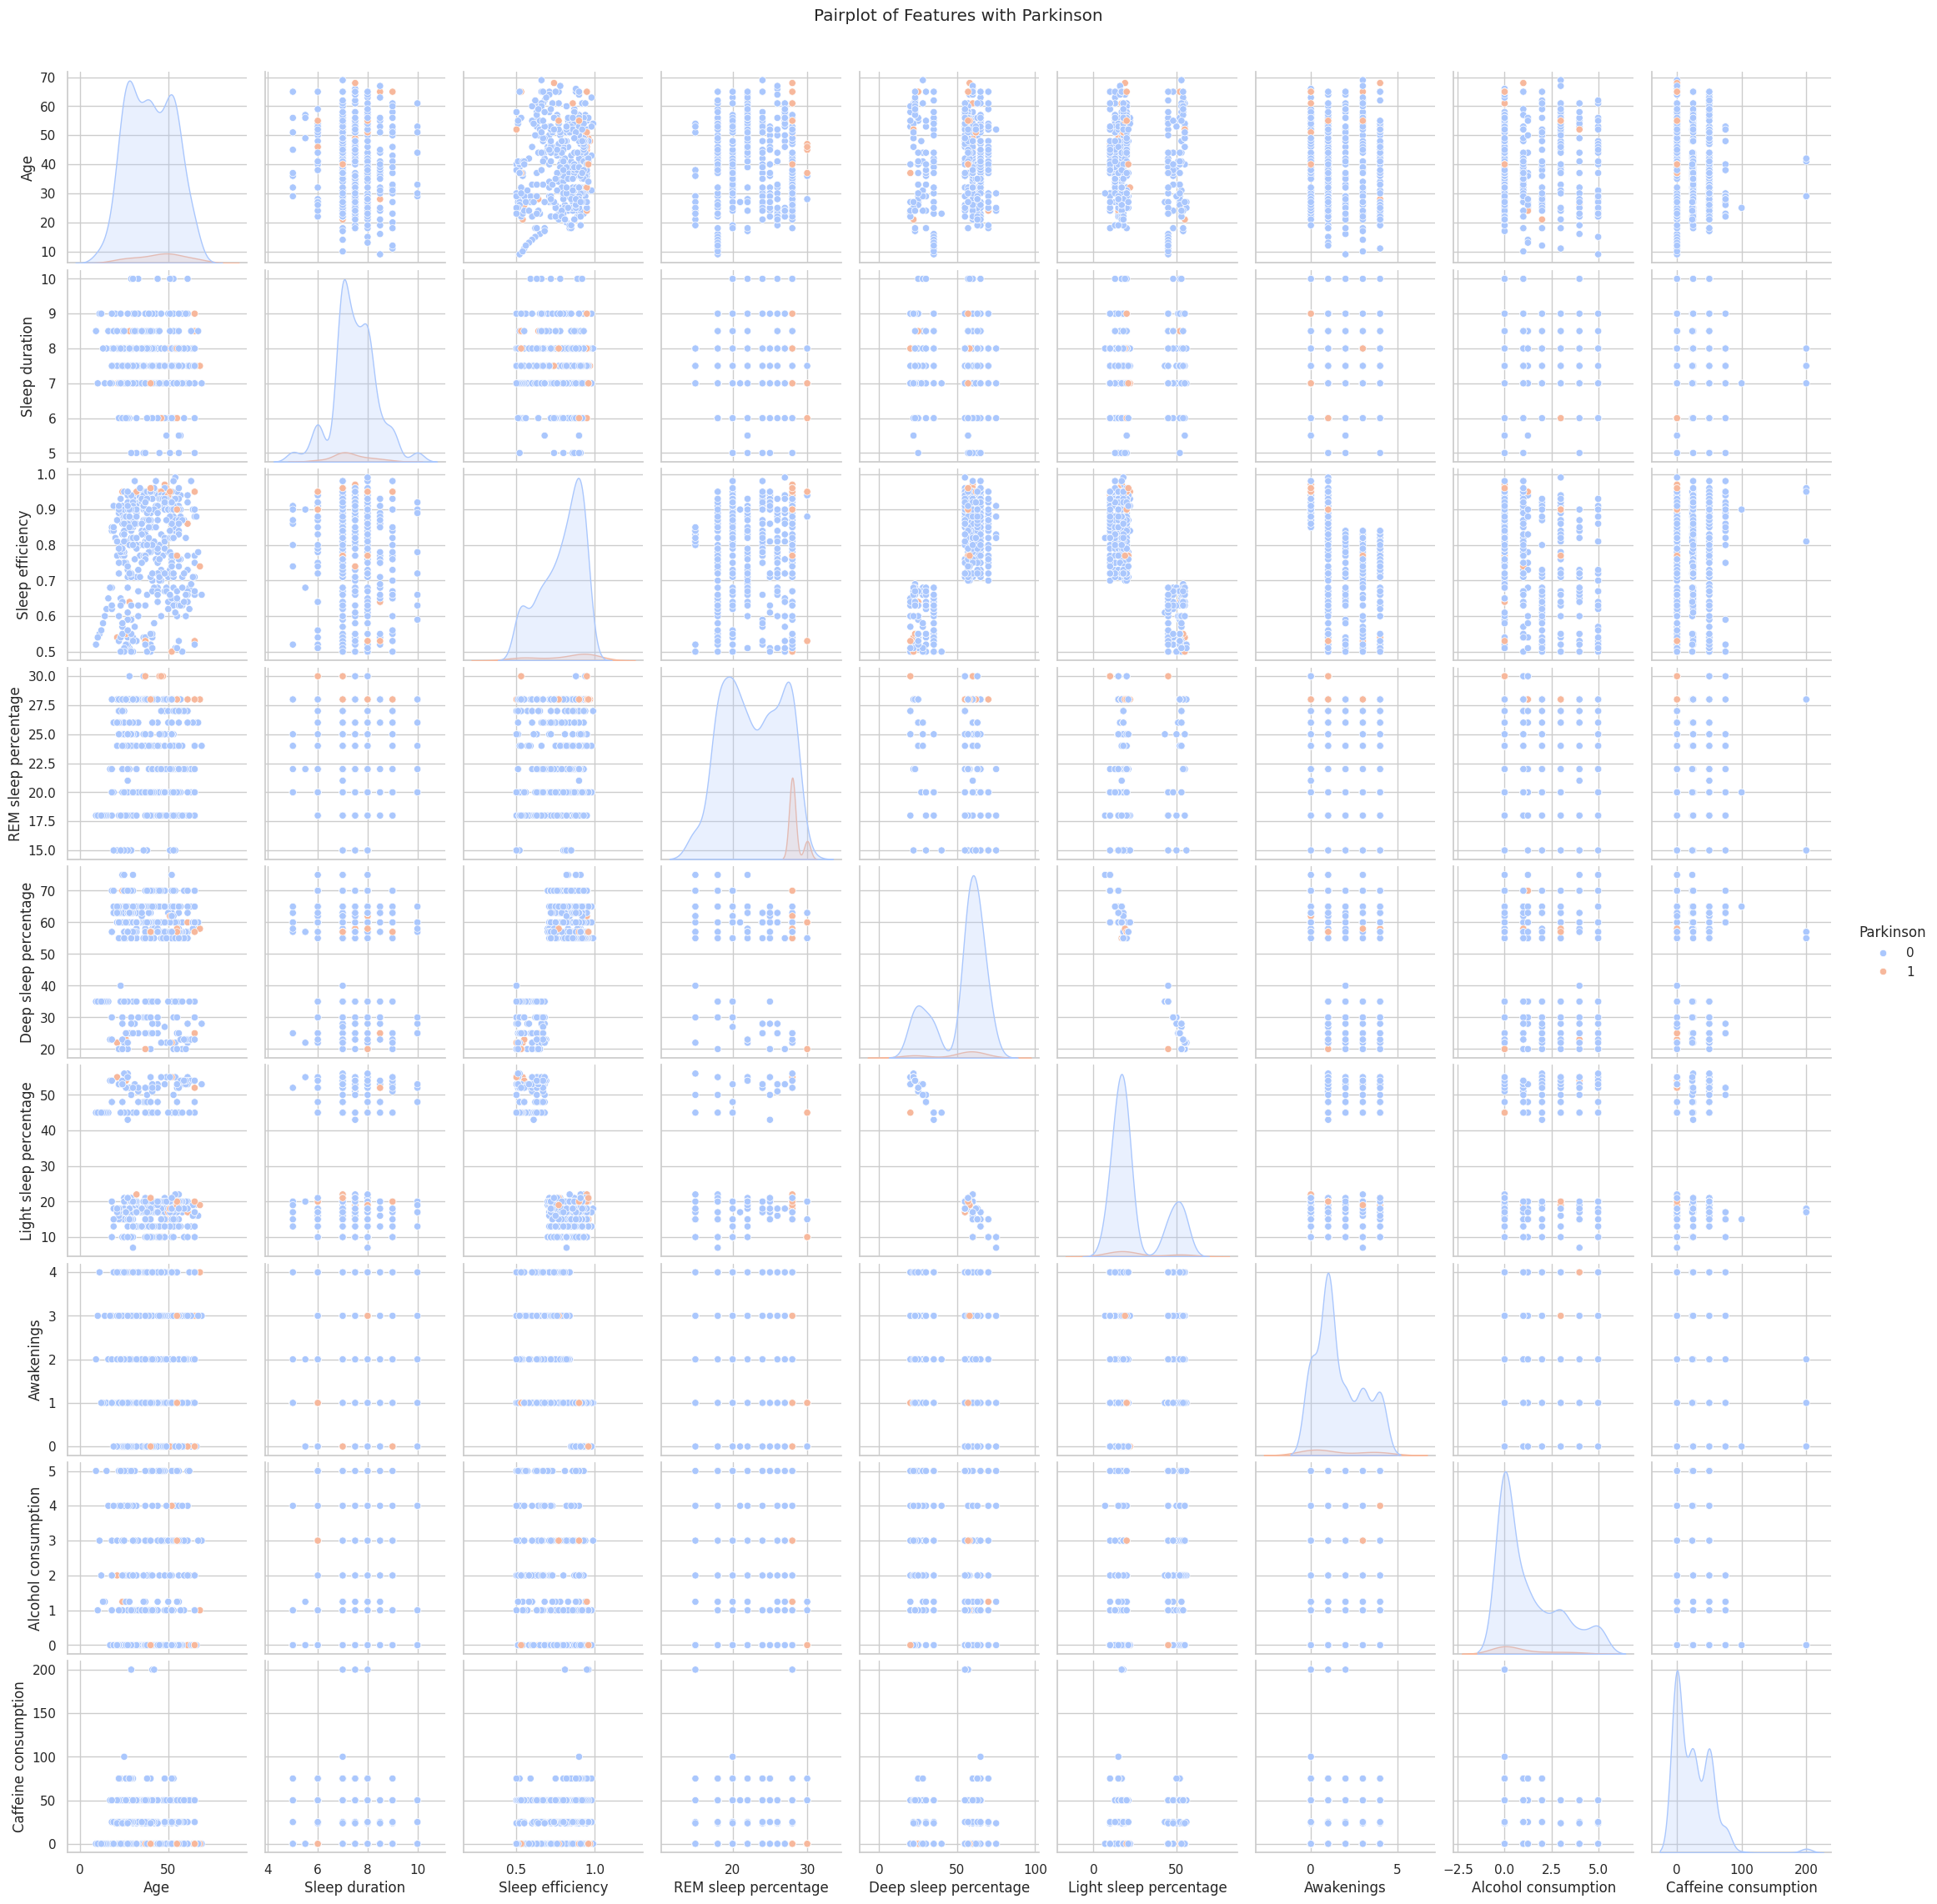

In [46]:
# Pairplot to explore relationships between variables and Parkinson
sns.pairplot(data, hue='Parkinson', vars=['Age','Sleep duration', 'Sleep efficiency',
                                          'REM sleep percentage', 'Deep sleep percentage',
                                          'Light sleep percentage', 'Awakenings','Alcohol consumption','Caffeine consumption'], palette='coolwarm')
plt.suptitle('Pairplot of Features with Parkinson', y=1.02)
plt.show()

<ipython-input-47-c27938afaa08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parkinson', y='Age', data=data, palette='pastel')
<ipython-input-47-c27938afaa08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parkinson', y='Sleep efficiency', data=data, palette='pastel')
<ipython-input-47-c27938afaa08>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parkinson', y='Awakenings', data=data, palette='pastel')
<ipython-input-47-c27938afaa08>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

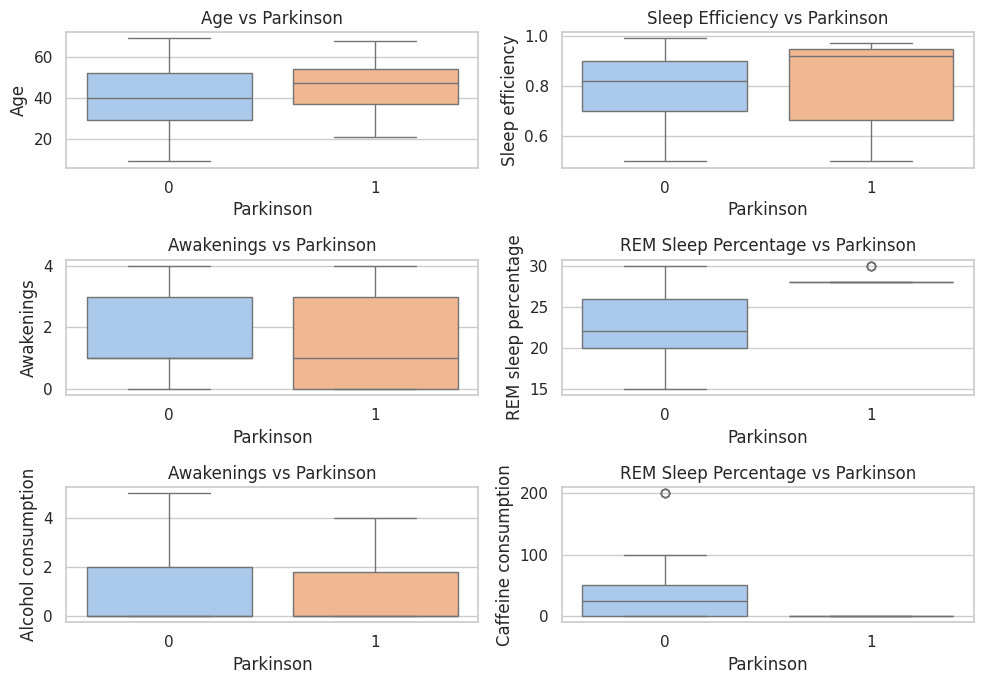

In [47]:
# Box plots to compare distributions
plt.figure(figsize=(10, 7))
plt.subplot(3, 2, 1)
sns.boxplot(x='Parkinson', y='Age', data=data, palette='pastel')
plt.title('Age vs Parkinson')
plt.subplot(3, 2, 2)
sns.boxplot(x='Parkinson', y='Sleep efficiency', data=data, palette='pastel')
plt.title('Sleep Efficiency vs Parkinson')
plt.subplot(3, 2, 3)
sns.boxplot(x='Parkinson', y='Awakenings', data=data, palette='pastel')
plt.title('Awakenings vs Parkinson')
plt.subplot(3, 2, 4)
sns.boxplot(x='Parkinson', y='REM sleep percentage', data=data, palette='pastel')
plt.title('REM Sleep Percentage vs Parkinson')
plt.subplot(3, 2, 5)
sns.boxplot(x='Parkinson', y='Alcohol consumption', data=data, palette='pastel')
plt.title('Awakenings vs Parkinson')
plt.subplot(3, 2, 6)
sns.boxplot(x='Parkinson', y='Caffeine consumption', data=data, palette='pastel')
plt.title('REM Sleep Percentage vs Parkinson')
plt.tight_layout()
plt.show()

# Feature selection and PCA

In [48]:
# Separate features and target
X = data.drop('Parkinson', axis=1)
y = data['Parkinson']

# Perform one-hot encoding
X = pd.get_dummies(X, columns=['Gender'])
X = pd.get_dummies(X, columns=['Bedtime'])
X = pd.get_dummies(X, columns=['Wakeup time'])

In [49]:
# Standardize the
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Perform PCA
pca = PCA(n_components=0.85)  # Retain 85% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split the data

In [53]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


#Model training function

In [54]:
from sklearn.utils.class_weight import compute_class_weight
#handle class weight
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.5255813953488372, 1: 10.272727272727273}


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc


# # Define a function to train and evaluate models

def train_evaluate_model(model, model_name):


    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("\n\n")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [56]:
# Define a function to train and evaluate models with class weights
def train_evaluate_model_with_weights(model, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")

   # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("\n\n")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

#

# Train and evaluate Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression with Class Weights
Accuracy: 0.96
Precision: 0.50
Recall: 0.50
ROC AUC: 0.88
Confusion Matrix:
[[85  2]
 [ 2  2]]



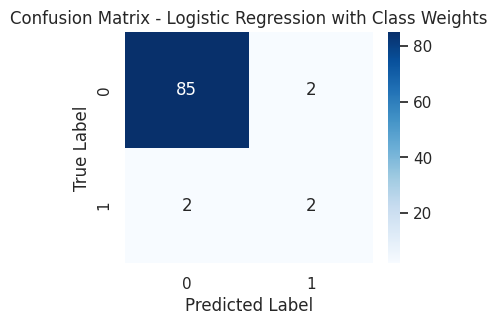

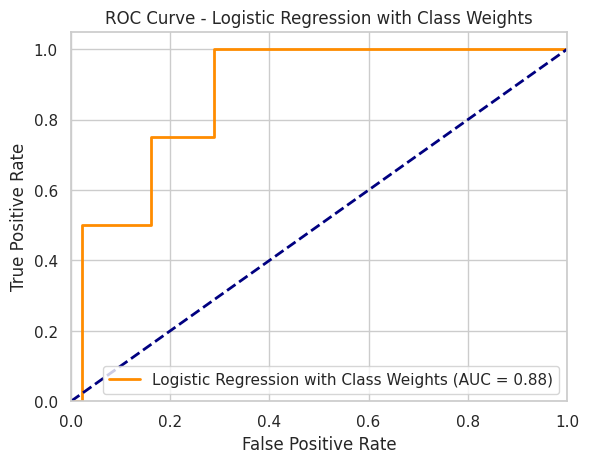

In [60]:
from sklearn.linear_model import LogisticRegression


# # Train and evaluate Logistic Regression
# logistic_regression = LogisticRegression()
# train_evaluate_model(logistic_regression, "Logistic Regression")

logistic_regression = LogisticRegression(class_weight=class_weight_dict)
train_evaluate_model_with_weights(logistic_regression, "Logistic Regression with Class Weights")


# Train and evaluate Random Forest


Model: Random Forest with Class Weights
Accuracy: 0.95
Precision: 0.00
Recall: 0.00
ROC AUC: 0.85
Confusion Matrix:
[[86  1]
 [ 4  0]]



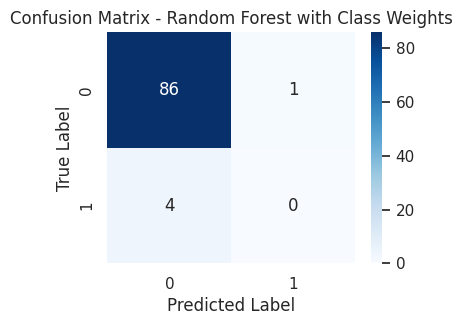

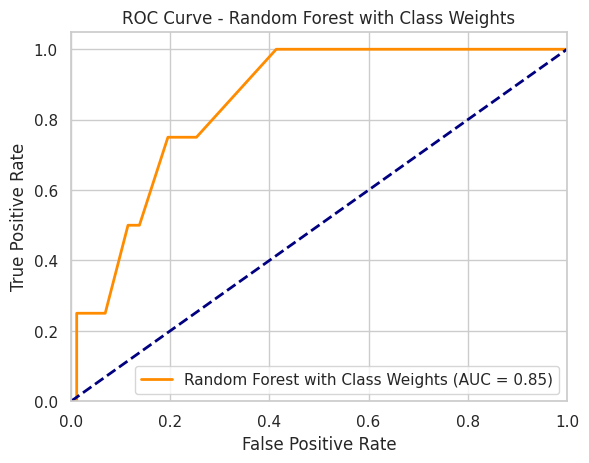

In [62]:
from sklearn.ensemble import RandomForestClassifier # import the RandomForestClassifier


# Train and evaluate Random Forest
# random_forest = RandomForestClassifier()
# train_evaluate_model(random_forest, "Random Forest")

random_forest = RandomForestClassifier(class_weight=class_weight_dict)
train_evaluate_model_with_weights(random_forest, "Random Forest with Class Weights")

# Train and evaluate Support Vector Machine


Model: Support Vector Machine with Class Weights
Accuracy: 0.95
Precision: 0.00
Recall: 0.00
ROC AUC: 0.82
Confusion Matrix:
[[86  1]
 [ 4  0]]



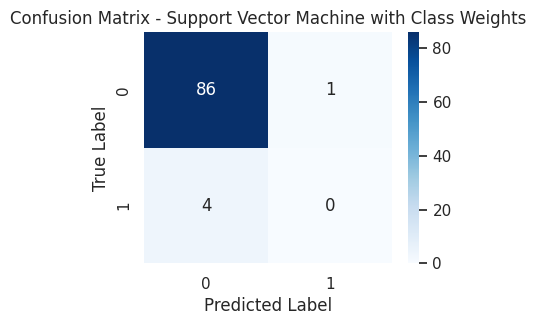

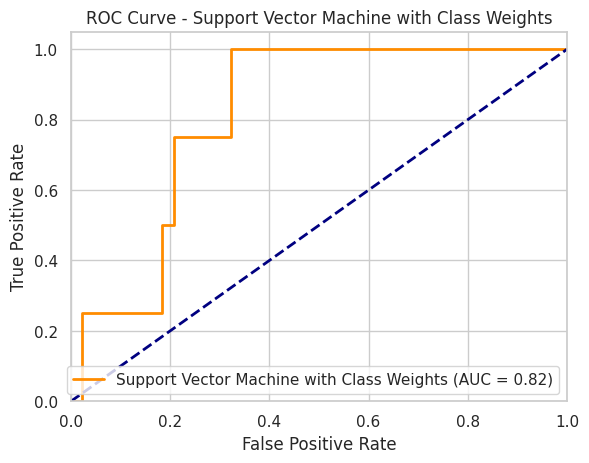

In [63]:
from sklearn.svm import SVC



# # Train and evaluate Support Vector Machine
# svm = SVC(probability=True)
# train_evaluate_model(svm, "Support Vector Machine")

svm = SVC(probability=True, class_weight='balanced')
train_evaluate_model_with_weights(svm, "Support Vector Machine with Class Weights")

# Train and evaluate K-Nearest Neighbors


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: K-Nearest Neighbors
Accuracy: 0.96
Precision: 0.00
Recall: 0.00
ROC AUC: 0.43
Confusion Matrix:
[[87  0]
 [ 4  0]]



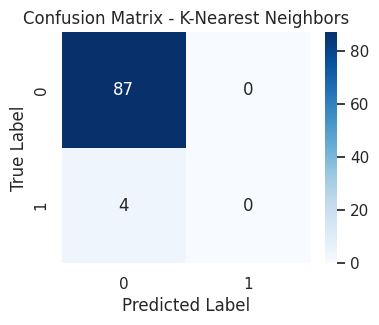

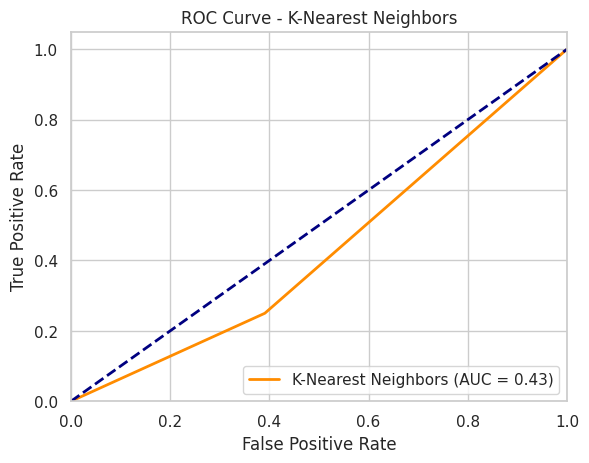

In [64]:
from sklearn.neighbors import KNeighborsClassifier


# # Train and evaluate K-Nearest Neighbors
# knn = KNeighborsClassifier()
# train_evaluate_model(knn, "K-Nearest Neighbors")


knn = KNeighborsClassifier()
train_evaluate_model_with_weights(knn, "K-Nearest Neighbors")